# plot function tests

In [35]:
__author__    = 'Steve Nicholes'
__copyright__ = 'Copyright (C) 2017 Steve Nicholes'
__license__   = 'GPL v3'
__version__   = '0.3.0'

In [3]:
# Imports
%load_ext autoreload
%autoreload 2
import sys
sys.path = [r'C:\GitHub\fivecentplots'] + sys.path
import fivecentplots as fcp
import pandas as pd
import numpy as np
import os, sys, pdb
%matplotlib inline
#import matplotlib.pyplot as mpl

osjoin = os.path.join
st = pdb.set_trace
fcp

<module 'fivecentplots' from 'C:\\GitHub\\fivecentplots\\fivecentplots\\__init__.py'>

In [4]:
SHOW = False

# Read sample data

In [5]:
df = pd.read_csv(r'C:\GitHub\fivecentplots\fivecentplots\tests\fake_data.csv')

# Theme

In [6]:
#fcp.set_theme('white')
#fcp.set_theme('gray')

# XY Plots

## With legend

Wall time: 1.91 s


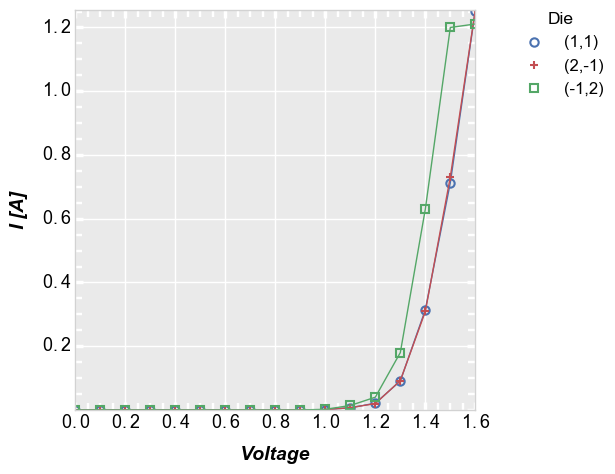

In [40]:
# Simple IV curves legended by die location
sub = df[(df.Substrate=='Si') &
         (df['Target Wavelength']==450) &
         (df['Boost Level']==0.2) &
         (df['Temperature [C]']==25).copy()
        ]
%time fcp.plot(df=sub, x='Voltage', y='I [A]', legend='Die', inline=True, show=SHOW)

## With title, no lines, and no legend

Wall time: 823 ms


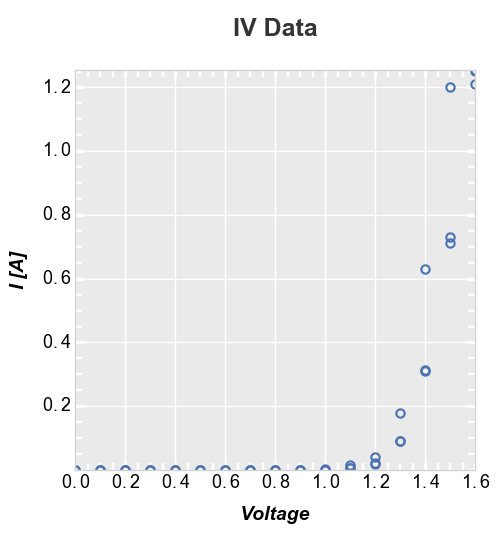

In [41]:
# Same data as above but with plot title, no legend, and no lines connecting the data points
sub = df[(df.Substrate=='Si') &
         (df['Target Wavelength']==450) &
         (df['Boost Level']==0.2) &
         (df['Temperature [C]']==25).copy()
        ]
%time fcp.plot(df=sub, x='Voltage', y='I [A]', inline=True, title='IV Data', lines=False, show=SHOW)

## Label formatting

Wall time: 915 ms


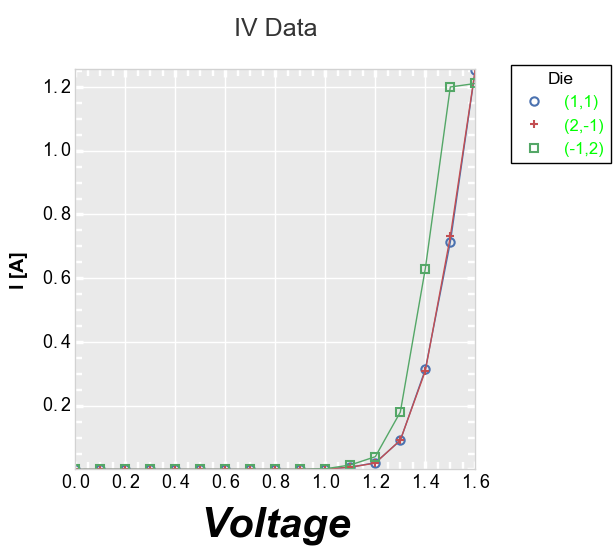

In [42]:
# Simple IV curves legended by die location but with custom label formatting
sub = df[(df.Substrate=='Si') &
         (df['Target Wavelength']==450) &
         (df['Boost Level']==0.2) &
         (df['Temperature [C]']==25).copy()
        ]
%time fcp.plot(df=sub, x='Voltage', y='I [A]', legend='Die', inline=True, title='IV Data', \
               label_x_font_size=30, label_y_font_style='normal', legend_font_color='#00FF00', \
               title_font_weight='normal', show=SHOW, legend_edge_color='k')

## Log scale

### Log x only

Wall time: 1.22 s


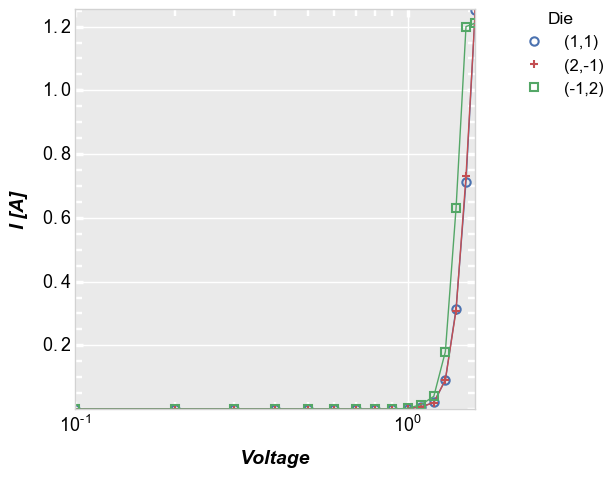

In [43]:
# Use ax_scale parameter = logx or semilogx
sub = df[(df.Substrate=='Si') &
         (df['Target Wavelength']==450) &
         (df['Boost Level']==0.2) &
         (df['Temperature [C]']==25).copy()
        ]
%time fcp.plot(df=sub, x='Voltage', y='I [A]', ax_scale='logx', legend='Die', inline=True, show=SHOW)

### Log log

Wall time: 969 ms


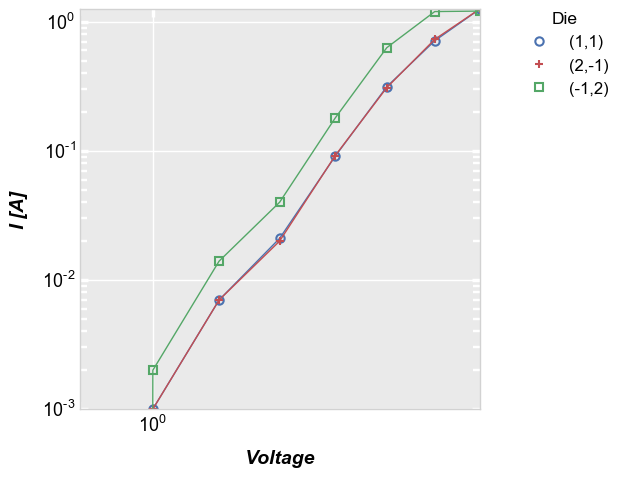

In [44]:
# Use ax_scale parameter = loglog
sub = df[(df.Substrate=='Si') &
         (df['Target Wavelength']==450) &
         (df['Boost Level']==0.2) &
         (df['Temperature [C]']==25).copy()
        ]
%time fcp.plot(df=sub, x='Voltage', y='I [A]', ax_scale='loglog', legend='Die', inline=True, show=SHOW, xmin=0.9)

# Secondary x|y plots

## Shared x axis

In [84]:
# Simple IV curves for one die and 
sub = df[(df.Substrate=='Si') &
         (df['Target Wavelength']==450) &
         (df['Boost Level']==0.2) &
         (df['Temperature [C]']==25).copy() &
         (df['Die']=="(-1,2)")
        ]
%time fcp.plot(df=sub, x='Voltage', y=['Voltage', 'I [A]'], legend='Die', inline=True, \
               twinx=True, show=SHOW, tick_labels_minor_y2=True)
# minor ticks labels on y2 fail
# need a twiny example

bah: axes[ia].get_xaxis().get_major_formatter().set_scientific(False)


KeyError: 'y2'

0

# Facet Grid Plots

## Axes shared (default)

Wall time: 3.24 s


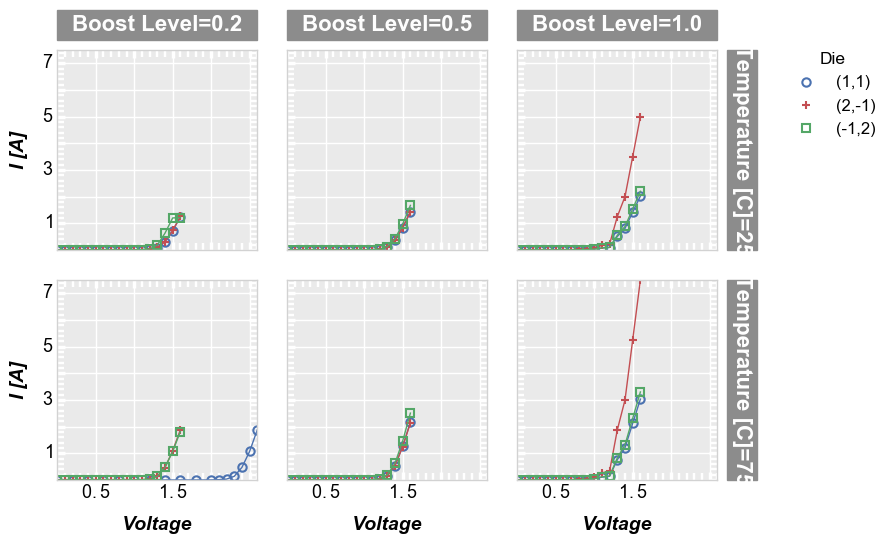

In [34]:
sub = df[(df.Substrate=='Si') & (df['Target Wavelength']==450)].copy()
%time fcp.plot(df=sub, x='Voltage', y='I [A]', legend='Die', col='Boost Level', row='Temperature [C]', \
               inline=True, show=False, ax_size=[200, 200])
# need to auto-shrink label text to fit
# bottom right looks wrong limits?

## Y-axis only shared

Wall time: 3.03 s


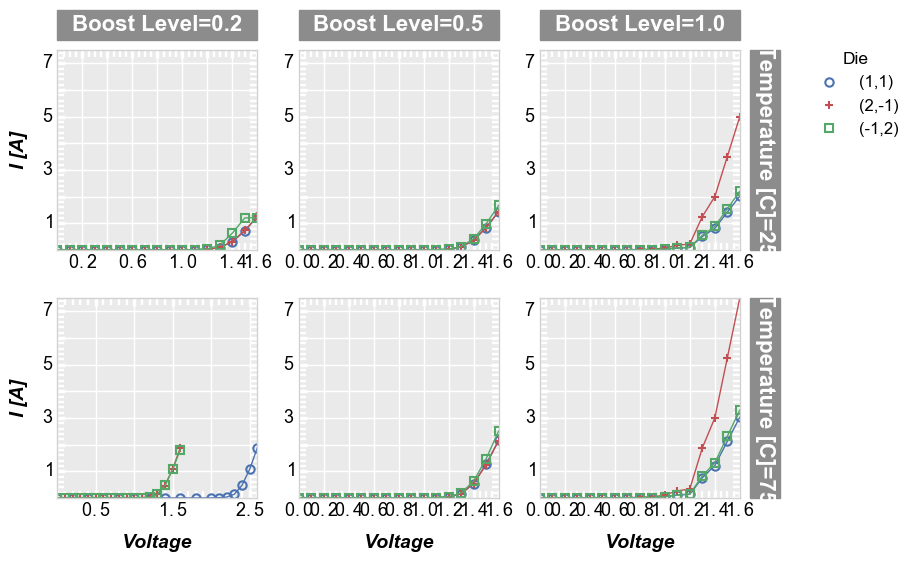

In [33]:
# Same data as 6.1
sub = df[(df.Substrate=='Si') & (df['Target Wavelength']==450)].copy()
%time fcp.plot(df=sub, x='Voltage', y='I [A]', legend='Die', col='Boost Level', row='Temperature [C]', \
               share_x=False, inline=True, show=False, ax_size=[200, 200])
# overlapping!

"leg_groups" is deprecated. Please use "legend" instead
> c:\github\fivecentplots\fivecentplots\layout.py(2473)set_axes_ticks()
-> if self.tick_cleanup and tlminon:
(Pdb) c
> c:\github\fivecentplots\fivecentplots\layout.py(2473)set_axes_ticks()
-> if self.tick_cleanup and tlminon:
(Pdb) c
Wall time: 9.23 s


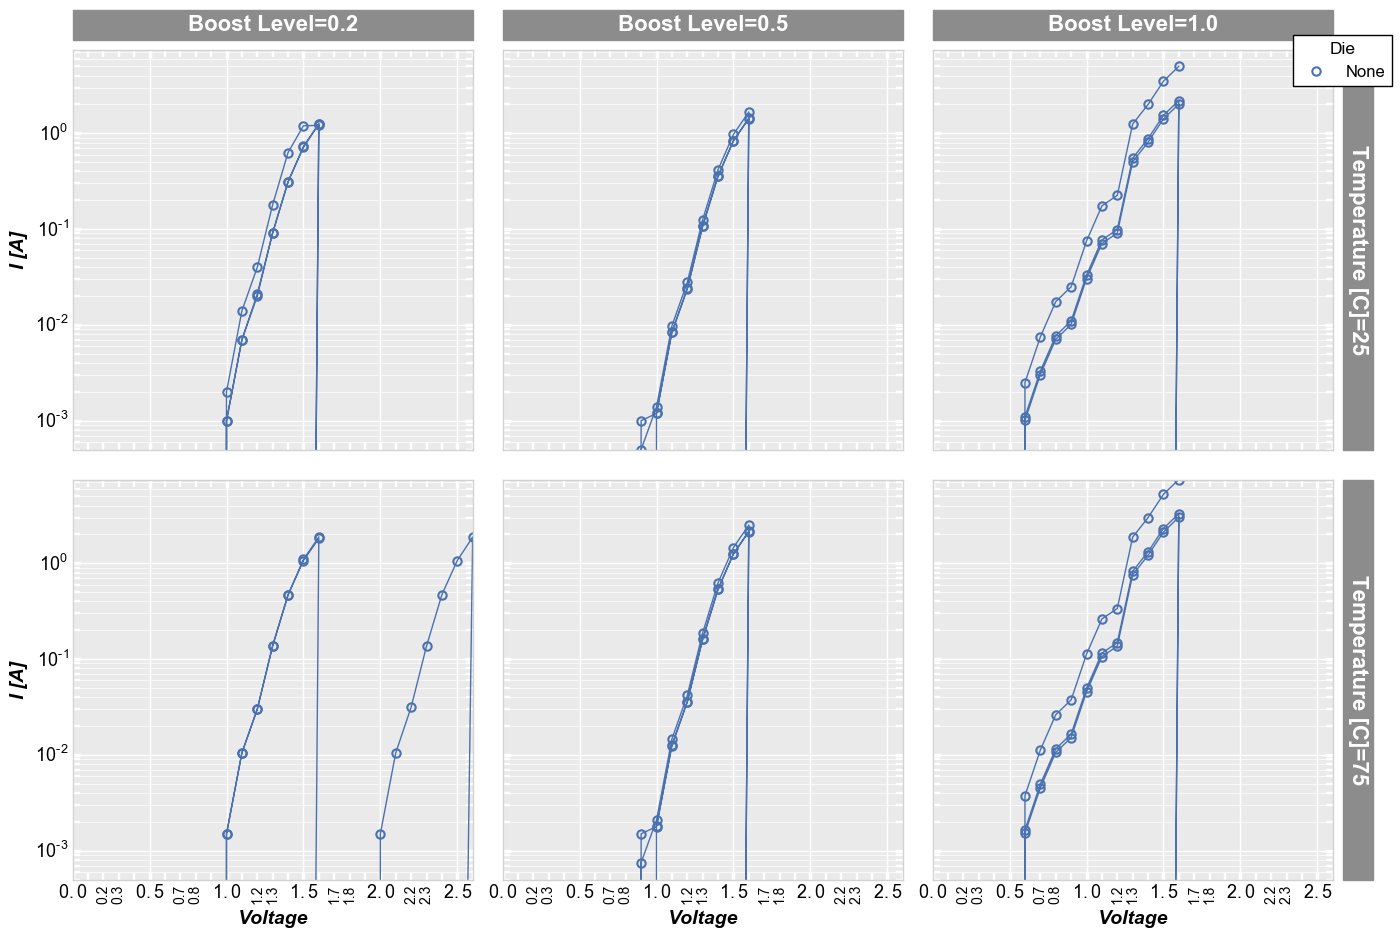

In [17]:
sub = df[(df.Substrate=='Si') & (df['Target Wavelength']==450)].copy()
%time fcp.plot(df=sub, x='Voltage', y='I [A]', ax_scale='logy', leg_groups='Die', col='Boost Level', row='Temperature [C]', \
               inline=True, show=SHOW, legend_edge_color='k', tick_labels_minor_x=True, \
               ax_size=[400,400], grid_minor_y=True, ticks_minor_number_x=4, tick_labels_minor_rotation_x=90, \
               tick_labels_minor_y=True)
# with log scaling

## Facet grid by boost level and temperature (no axis sharing)

In [ ]:
sub = df[(df.Substrate=='Si') &
         (df['Target Wavelength']==450)].copy()
fcp.plot(df=sub, x='Voltage', y='I [A]', leg_groups='Die', row='Boost Level', col='Temperature [C]',
         sharex=False, sharey=False, ax_size=[200,300], inline=True, show=SHOW)

## Facet grid by boost level and temperature with transformation

In [ ]:
sub = df[(df.Substrate=='Si') &
         (df['Target Wavelength']==450)].copy()
fcp.plot(df=sub, x='Voltage', y='I [A]', leg_groups='Die', row='Boost Level', col='Temperature [C]', ax_scale='logx',
          ytrans=('pow',4), ymin=1E-8, ymax=1E-2, inline=True, show=SHOW)  #issues here with ranges, ticks

## Wrap example

In [ ]:
sub = df[(df.Substrate=='Si') &
          (df['Target Wavelength']==450)].copy()
fcp.plot(df=sub, x='Voltage', y='I [A]', leg_groups='Die', wrap='Temperature [C]', ax_size=[200,200],
         inline=True, show=SHOW, ax_scale='logy', ticks=False)

In [ ]:
sub = df[(df.Substrate=='Si') &
          (df['Target Wavelength']==450)].copy()
fcp.plot(df=sub, x='Voltage', y='I [A]', leg_groups='Die', wrap=['Boost Level', 'Temperature [C]'], ax_size=[200,200],
         inline=True, show=SHOW, ax_scale='logy', ticks=False)

## Fig groups example

In [ ]:
fcp.plot(df=df, x='Voltage', y='I [A]', leg_groups='Die', fig_groups=['Substrate'],
         row='Boost Level', col='Temperature [C]', ax_scale='logx',
         ytrans=('pow',4), ymin=1E-8, ymax=1E-2, inline=True, show=SHOW)  #issues here with ranges, ticks

In [ ]:
fcp.plot(df=df, x='Voltage', y='I [A]', leg_groups='Die', fig_groups=['Substrate', 'Target Wavelength'],
         row='Boost Level', col='Temperature [C]', ax_scale='logx', ytrans=('pow',4), ymin=1E-8, ymax=1E-2, 
         inline=True, show=SHOW)

## Multiple y on same axis with filter

In [ ]:
filt = 'Substrate=="Si" & Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25'
fcp.plot(df=df, x='Voltage', y=['I [A]', 'Voltage'], filter=filt, leg_groups='Die', ylabel='Values', 
         inline=True, show=SHOW)

## Multiple y on same axis with filter and twinx

In [ ]:
filt = 'Substrate=="Si" & Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25'
fcp.plot(df=df, x='Voltage', y=['I [A]', 'Voltage'], filter=filt, inline=True, leg_groups='Die', 
         ylabel='I [A]', ylabel2='Voltage', twinx=True, ax_size=[350,350], show=SHOW)

NEED STAT_VAL TEST

In [ ]:
filt = 'Substrate=="Si" & Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25'
fcp.plot(df=df, x='Voltage', y='I [A]', filter=filt, leg_groups='Die', ylabel='Values', inline=True, 
         conf_int='range', show=SHOW)

In [ ]:
filt = 'Substrate=="Si" & Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25'
fcp.plot(df=df, x='Voltage', y='I [A]', filter=filt, leg_groups='Die', ylabel='Values', inline=True, 
         conf_int=0.99, show=SHOW)